# **Unsupervised Algorithms**

# prompt: what is Unsupervised Algorithms

Unsupervised algorithms are a category of machine learning algorithms that learn patterns and relationships in data without explicit guidance or labeled examples.  Unlike supervised learning, where the algorithm is trained on data with known outputs, unsupervised learning explores the data's inherent structure to discover hidden patterns, groupings, or anomalies.

Here's a breakdown of key characteristics and examples:

**Key Characteristics:**

* **No labeled data:**  The algorithm works with input data that has no corresponding output or target variable.
* **Exploratory data analysis:** Unsupervised learning is often used for exploratory data analysis, helping to understand the underlying structure of the data.
* **Pattern discovery:** The primary goal is to identify patterns, relationships, and anomalies within the data.
* **Clustering:**  A common task is grouping similar data points together into clusters.
* **Dimensionality reduction:**  Reducing the number of variables while preserving important information.
* **Anomaly detection:** Identifying data points that deviate significantly from the norm.


**Common Unsupervised Algorithms:**

* **Clustering:**
    * **K-Means:** Partitions data into k clusters based on distance to cluster centroids.
    * **Hierarchical Clustering:** Builds a hierarchy of clusters, either agglomerative (bottom-up) or divisive (top-down).
    * **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):** Groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions.
    * **Gaussian Mixture Models (GMM):**  Assumes data points are generated from a mixture of several Gaussian distributions.

* **Dimensionality Reduction:**
    * **Principal Component Analysis (PCA):**  Transforms data into a new coordinate system, where the principal components (new axes) capture the maximum variance in the data.
    * **t-distributed Stochastic Neighbor Embedding (t-SNE):**  Reduces the dimensionality of data while preserving local neighborhood relationships, often used for visualization.

* **Association Rule Learning:**
    * **Apriori Algorithm:**  Discovers frequent itemsets and association rules in transactional databases (e.g., market basket analysis).

**Applications:**

* **Customer segmentation:** Grouping customers based on purchasing behavior or demographics.
* **Anomaly detection in fraud detection:** Identifying unusual transactions that may indicate fraudulent activity.
* **Image segmentation:** Partitioning an image into meaningful regions.
* **Recommendation systems:** Recommending products or services based on user preferences.
* **Data compression:** Reducing the size of data while preserving important information.


In summary, unsupervised algorithms provide valuable tools for exploring data, uncovering hidden patterns, and gaining insights without the need for pre-existing labels.  The choice of algorithm depends heavily on the specific problem and the characteristics of the data.


# K Means Algorithms

[[-8.55503989  7.06461794]
 [-6.13753182 -6.58081701]
 [-6.32130028 -6.8041042 ]
 ...
 [ 3.69047995  4.60555175]
 [-7.48913939 -7.0670809 ]
 [-9.40049578  7.11430104]]


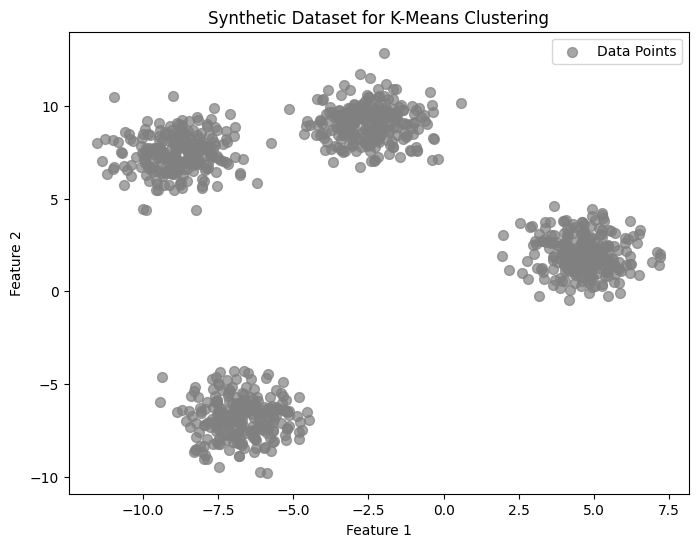

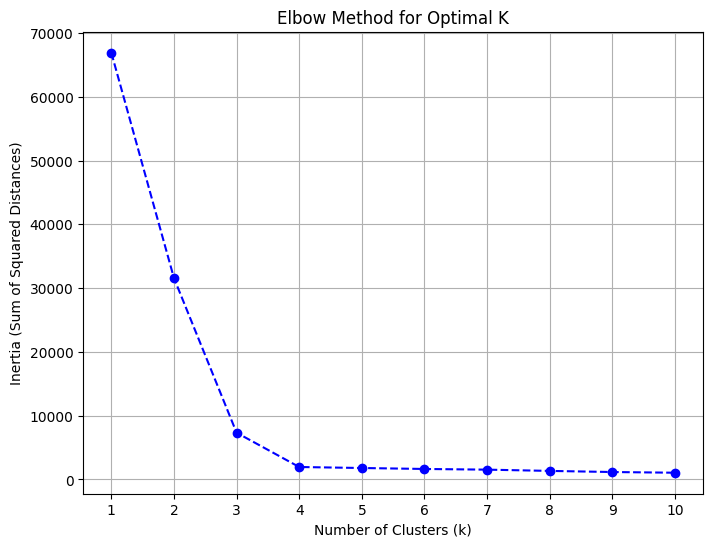

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)
print(X)
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.7, label='Data Points')
plt.title("Synthetic Dataset for K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Elbow method to determine the optimal number of clusters
inertia = []  # Sum of squared distances for each k
k_values = range(1, 11)  # Number of clusters to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.xticks(k_values)
plt.grid()
plt.show()




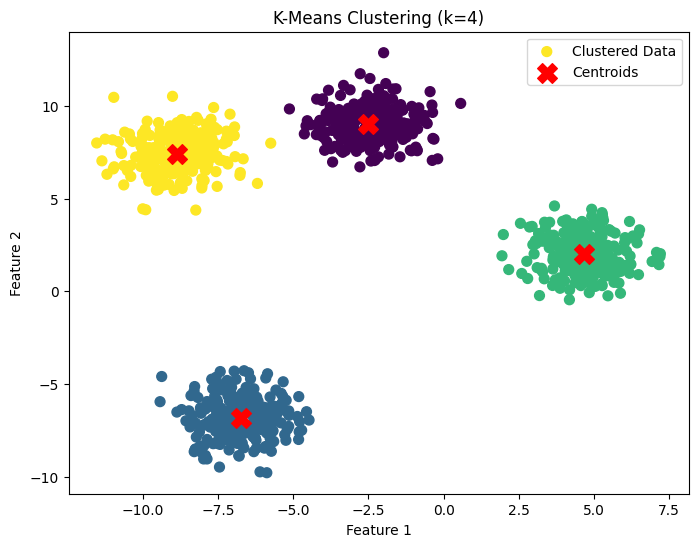

In [ ]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50, label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

#What is Hierarchical Clustering

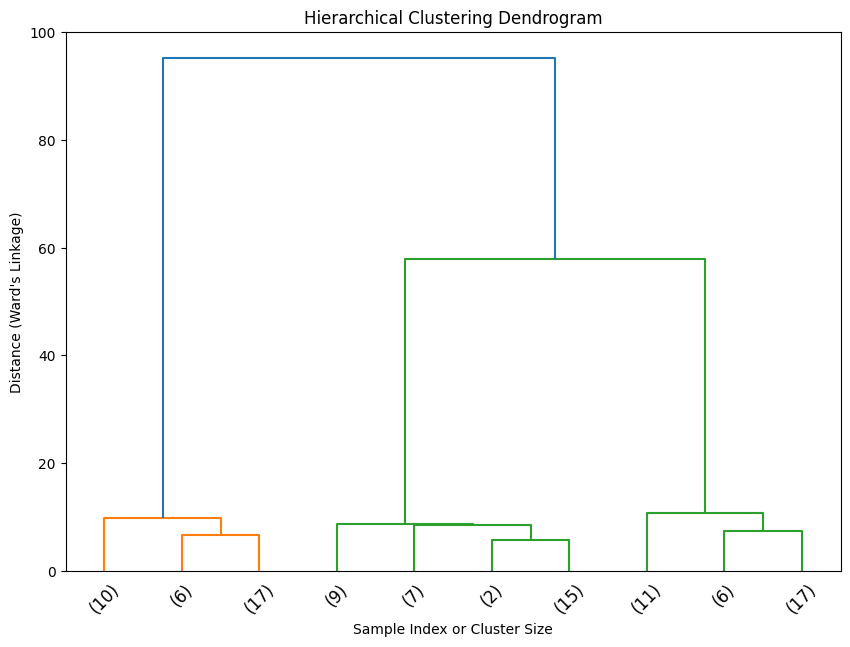

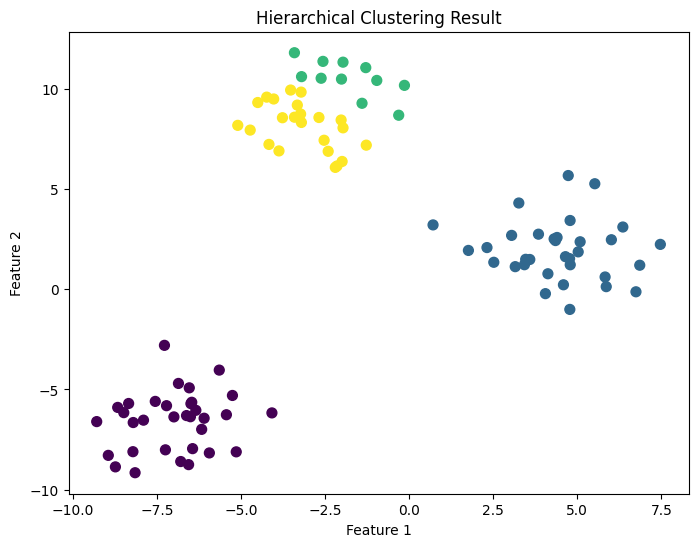

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.datasets import make_blobs


# Generate synthetic dataset
np.random.seed(42)
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Perform hierarchical clustering using Ward's method
linkage_matrix = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode="lastp", p=10, leaf_rotation=45, leaf_font_size=12)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance (Ward's Linkage)")
plt.show()

# Cut the dendrogram at a specific threshold distance to form clusters
threshold = 10
clusters = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Hierarchical Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


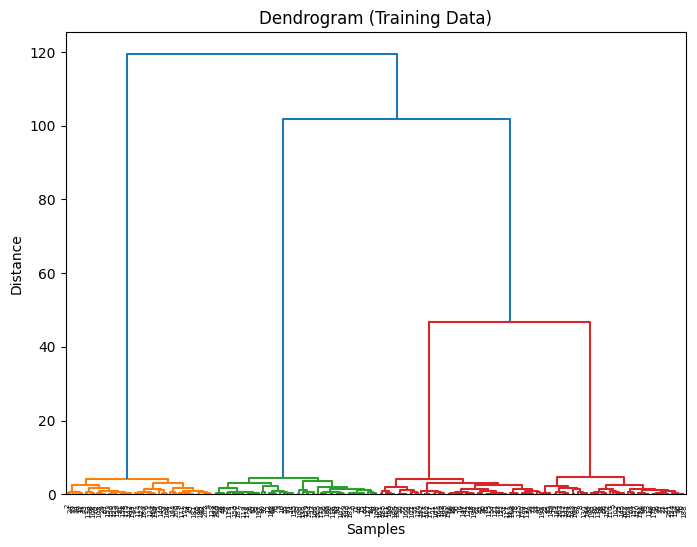

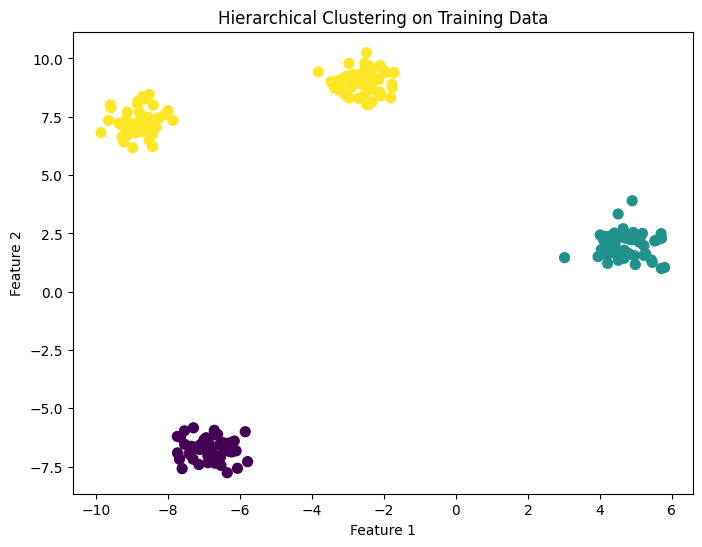

Silhouette Score for Training Data: 0.81


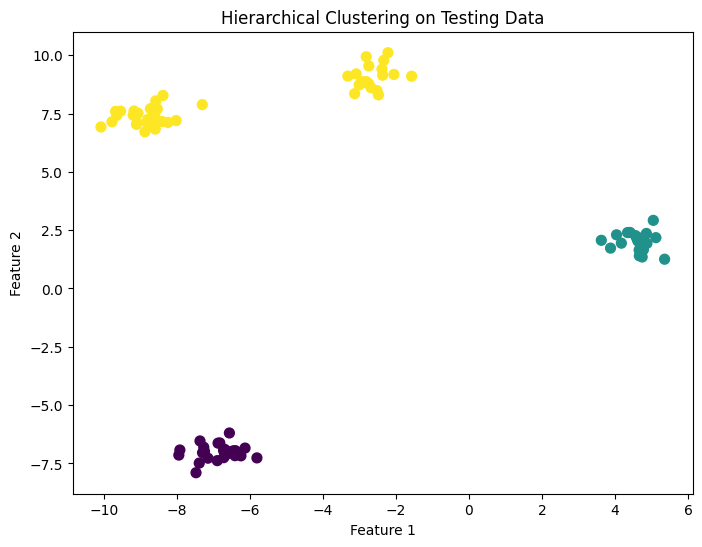

Silhouette Score for Testing Data: 0.81


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform hierarchical clustering on the training data
linkage_matrix = linkage(X_train, method="ward")
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram (Training Data)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Determine optimal number of clusters using dendrogram
optimal_threshold = linkage_matrix[-(4 - 1), 2]  # Assuming we know there are 4 clusters
train_labels = fcluster(linkage_matrix, t=optimal_threshold, criterion="distance")

# Plot clustering results for training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate training clusters with silhouette score
train_score = silhouette_score(X_train, train_labels)
print(f"Silhouette Score for Training Data: {train_score:.2f}")

# Predict clusters for testing data
linkage_matrix_test = linkage(X_test, method="ward")
test_labels = fcluster(linkage_matrix_test, t=optimal_threshold, criterion="distance")

# Plot clustering results for testing data
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_labels, cmap="viridis", s=50)
plt.title("Hierarchical Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluate testing clusters with silhouette score
test_score = silhouette_score(X_test, test_labels)
print(f"Silhouette Score for Testing Data: {test_score:.2f}")


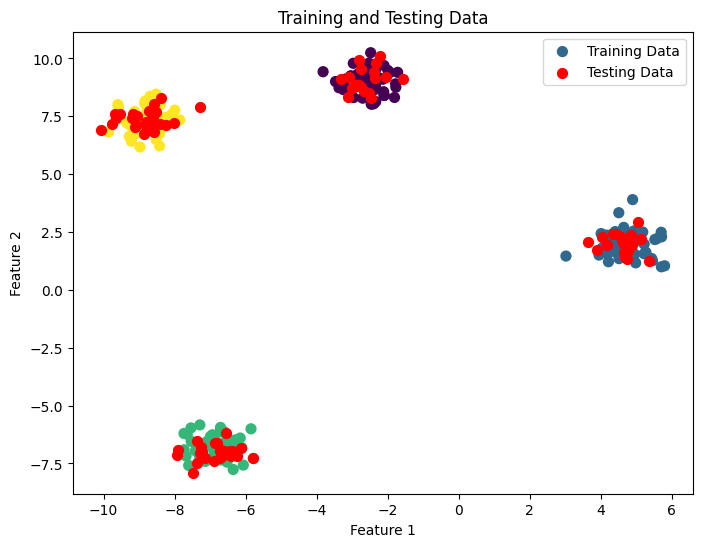

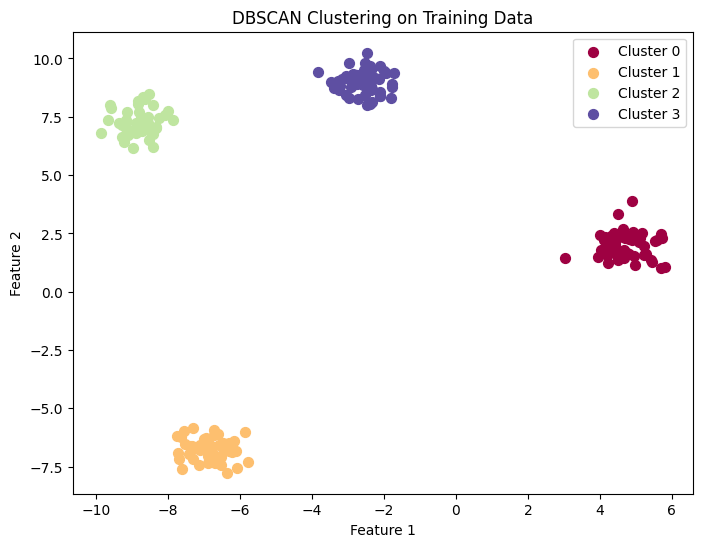

Silhouette Score for Training Data: 0.89


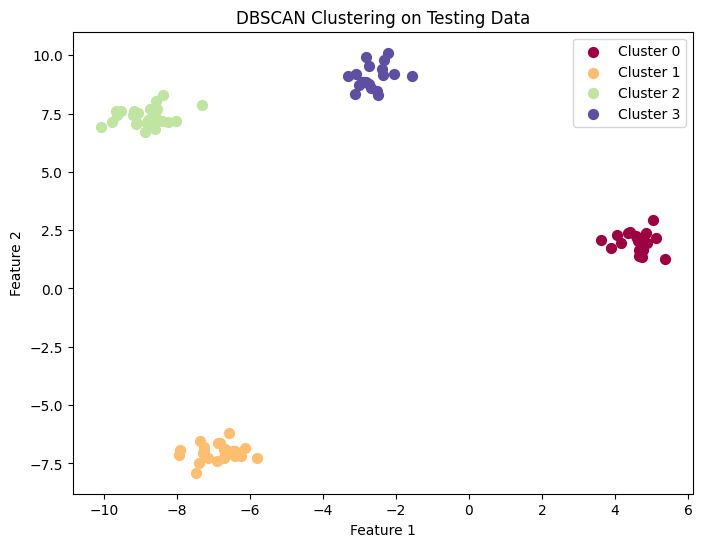

Silhouette Score for Testing Data: 0.90


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Generate synthetic dataset
np.random.seed(42)
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.5, random_state=42)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of the training data
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', s=50, label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', s=50, label="Testing Data")
plt.title("Training and Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Apply DBSCAN on the training data
dbscan = DBSCAN(eps=1, min_samples=5)  # eps: neighborhood size, min_samples: minimum points in a cluster
train_labels = dbscan.fit_predict(X_train)

# Plot DBSCAN clustering results for training data
plt.figure(figsize=(8, 6))
unique_labels = set(train_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (train_labels == k)
    xy = X_train[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on training data
core_samples_mask = (train_labels != -1)
if len(set(train_labels[core_samples_mask])) > 1:  # At least two clusters are required for silhouette score
    score = silhouette_score(X_train[core_samples_mask], train_labels[core_samples_mask])
    print(f"Silhouette Score for Training Data: {score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")

# Predict clusters for the testing data
test_labels = dbscan.fit_predict(X_test)

# Plot DBSCAN clustering results for testing data
plt.figure(figsize=(8, 6))
unique_labels_test = set(test_labels)
colors_test = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_test))]

for k, col in zip(unique_labels_test, colors_test):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (test_labels == k)
    xy = X_test[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=tuple(col), label=f"Cluster {k}" if k != -1 else "Noise")

plt.title("DBSCAN Clustering on Testing Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate clustering performance using silhouette score on testing data
core_samples_mask_test = (test_labels != -1)
if len(set(test_labels[core_samples_mask_test])) > 1:
    test_score = silhouette_score(X_test[core_samples_mask_test], test_labels[core_samples_mask_test])
    print(f"Silhouette Score for Testing Data: {test_score:.2f}")
else:
    print("Silhouette score cannot be calculated with less than 2 clusters.")


# **PCA**

Principal Components:
 [[0.6778734  0.73517866]]
Explained Variance Ratio:
 [0.96318131]


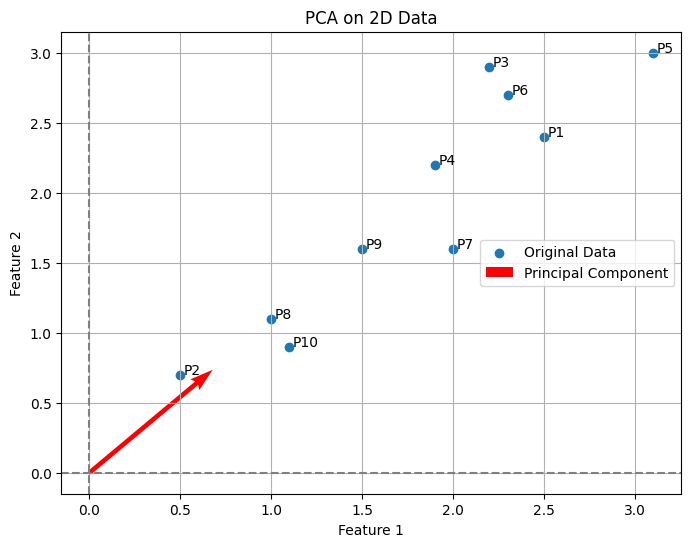

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the dataset
X = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2],
              [3.1, 3.0], [2.3, 2.7], [2.0, 1.6], [1.0, 1.1],
              [1.5, 1.6], [1.1, 0.9]])

# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Step 2: Apply PCA using sklearn
pca = PCA(n_components=1)  # Reduce to 1 principal component
X_pca = pca.fit_transform(X_centered)

# Print results
print("Principal Components:\n", pca.components_)
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

# Plot original data and principal component
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Original Data")
for i, (x, y) in enumerate(X):
    plt.text(x + 0.02, y, f"P{i+1}")
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=1, color="r", label="Principal Component")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.title("PCA on 2D Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Determine the number of components to retain 80% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
components_to_keep = np.argmax(explained_variance_ratio >= 0.8) + 1
print(f"Number of components to retain 80% variance: {components_to_keep}")

# Reduce the dataset to the selected components
pca_reduced = PCA(n_components=components_to_keep)
X_train_reduced = pca_reduced.fit_transform(X_train_scaled)
X_test_reduced = pca_reduced.transform(X_test_scaled)

# Train a classifier on the reduced data
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_reduced, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")

# Features before and after PCA
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {components_to_keep}")


Number of components to retain 80% variance: 2
Accuracy on test data: 90.00%
Original number of features: 4
Reduced number of features: 2


Dataset (Binary Encoding):
    Bread  Butter   Eggs    Jam   Milk
0   True    True  False  False   True
1   True    True  False   True  False
2   True   False   True  False   True
3   True    True   True  False   True
4   True   False   True  False  False

Frequent Itemsets:
    support         itemsets
0      1.0          (Bread)
1      0.6         (Butter)
2      0.6           (Eggs)
3      0.6           (Milk)
4      0.6  (Bread, Butter)
5      0.6    (Eggs, Bread)
6      0.6    (Bread, Milk)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (Bread)    (Butter)                 1.0                 0.6      0.6   
1    (Butter)     (Bread)                 0.6                 1.0      0.6   
2      (Eggs)     (Bread)                 0.6                 1.0      0.6   
3     (Bread)      (Eggs)                 1.0                 0.6      0.6   
4     (Bread)      (Milk)                 1.0                 0.6      0.6   
5      (Mi

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


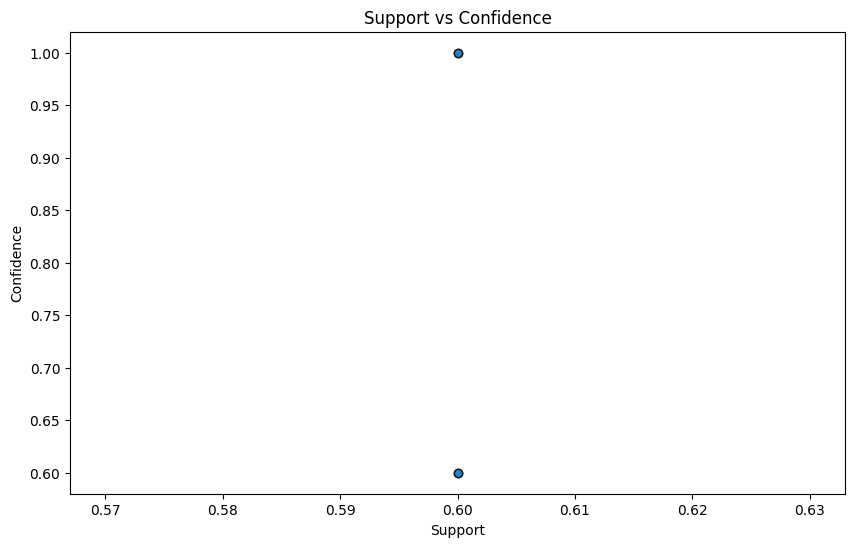

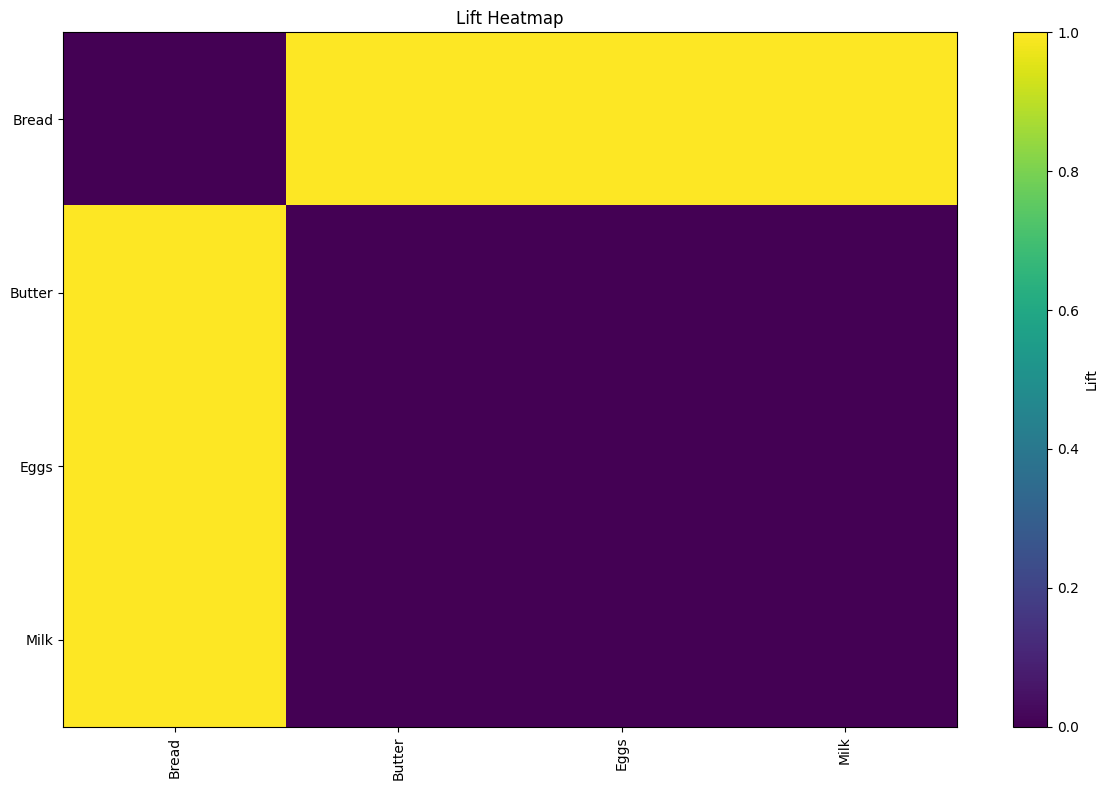

<Figure size 1000x600 with 0 Axes>

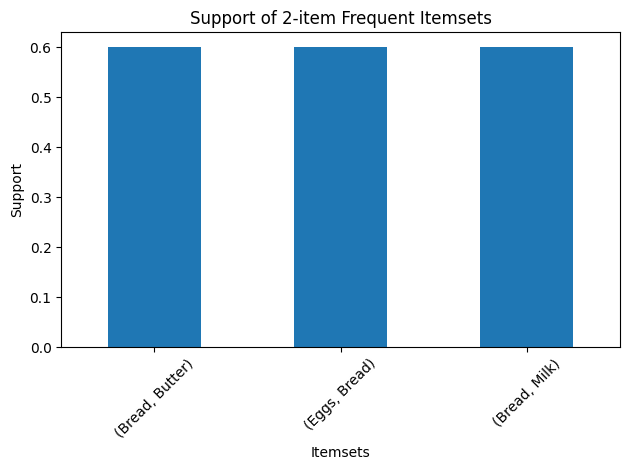

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Sample dataset: List of transactions
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Bread', 'Butter', 'Jam'],
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Butter', 'Eggs', 'Bread'],
    ['Bread', 'Eggs']
]

# Convert transactions into a DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset (Binary Encoding):\n", df)

# Apply Apriori algorithm to find frequent itemsets
min_support = 0.5
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=5)
print("\nAssociation Rules:\n", rules)

# Plot the support vs confidence for rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Plot heatmap of lift
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()

# Plot bar chart for frequent itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] == 2]
plt.figure(figsize=(10, 6))
frequent_itemsets.plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Support of 2-item Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Sample:
   cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                     

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)



Association Rules:
         antecedents                     consequents  antecedent support  \
0               (c)                             (b)            0.855244   
1               (b)                             (c)            0.947070   
2               (d)                             (b)            0.387494   
3               (b)                             (e)            0.947070   
4               (e)                             (b)            0.964549   
...             ...                             ...                 ...   
1114939   (p, y, t)     (s, k, w, e, f, b, o, n, c)            0.415559   
1114940   (t, y, n)     (s, k, w, e, f, b, o, p, c)            0.402757   
1114941   (c, y, t)     (s, k, w, e, f, b, o, p, n)            0.409650   
1114942      (k, y)  (s, e, f, w, b, o, p, n, c, t)            0.409527   
1114943      (y, t)  (s, k, e, f, w, b, o, p, n, c)            0.415559   

         consequent support   support  confidence      lift  representativity 

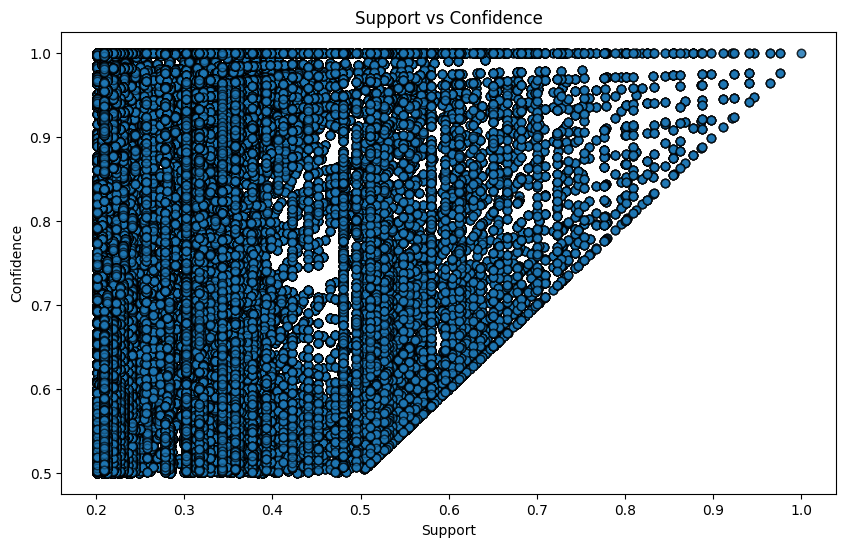

KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import fetch_openml
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Load Mushroom dataset from sklearn
mushroom_data = fetch_openml(name='mushroom', version=1, as_frame=True)
df = mushroom_data.frame

# Display basic info
print("Dataset Sample:\n", df.head())
print("Shape of the dataset:", df.shape)

# Convert to transactional format
transactions = df.astype(str).values.tolist()

# Encode transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori algorithm
min_support = 0.2  # 20% minimum support
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)
print("\nFrequent Itemsets:\n", frequent_itemsets)

# Generate association rules
min_confidence = 0.5  # 50% minimum confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=1)
print("\nAssociation Rules:\n", rules)

# Visualize support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.6, edgecolors='k')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Visualize lift with a heatmap
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot(index='antecedents', columns='consequents', values='lift').fillna(0)
plt.figure(figsize=(12, 8))
plt.title('Lift Heatmap')
plt.imshow(lift_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Lift')
plt.xticks(range(len(lift_matrix.columns)), lift_matrix.columns, rotation=90)
plt.yticks(range(len(lift_matrix.index)), lift_matrix.index)
plt.tight_layout()
plt.show()



Reinforcement learning is a type of machine learning where an agent learns to interact with an environment to maximize a cumulative reward.  It differs from supervised and unsupervised learning in that it doesn't rely on labeled data or the discovery of patterns in unlabeled data. Instead, the agent learns through trial and error, receiving feedback in the form of rewards or penalties for its actions.

Here's a breakdown of key concepts:

* **Agent:** The learner and decision-maker.
* **Environment:**  The world in which the agent operates.
* **State:** The current situation of the environment.
* **Action:**  What the agent does in a given state.
* **Reward:** Feedback from the environment, indicating the desirability of the agent's action.
* **Policy:** The strategy that the agent uses to choose actions in different states.  This is what the agent learns.


The goal of reinforcement learning is to learn an optimal policy, which maximizes the expected cumulative reward over time.  This is typically done through iterative interactions with the environment.  The agent explores different actions and observes the resulting rewards.  Over time, it learns to associate states with actions that lead to high rewards, improving its policy.

Several algorithms exist to achieve this, such as Q-learning, SARSA, and Deep Q-Networks (DQN).  DQNs, for instance, combine reinforcement learning with deep neural networks, enabling agents to learn complex policies from high-dimensional sensory inputs.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


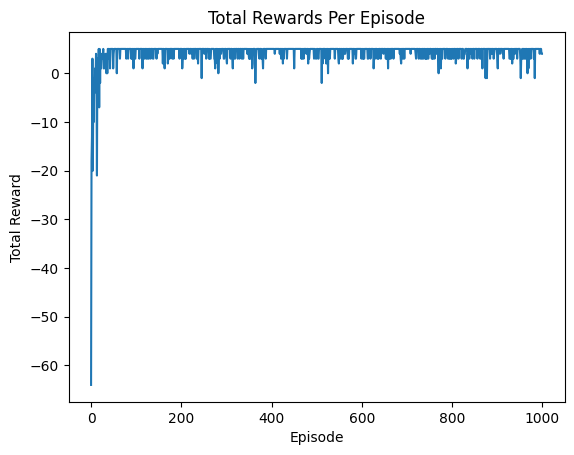

State (0, 0): [0.32104304 1.35349942 0.52164679 1.8098    ]
State (0, 1): [1.02793068 3.122      0.3266657  2.43851596]
State (0, 2): [ 0.01743438  4.53455618 -0.54153551 -0.69508337]
State (0, 3): [-0.3940399   0.69865319 -0.42438518 -0.48847518]
State (1, 0): [-1.09045349 -1.15719134 -1.21481649  3.08582552]
State (1, 1): [1.69879879 4.03741925 1.18710147 4.58      ]
State (1, 2): [2.28033672 6.2        2.91132162 5.17491674]
State (1, 3): [-0.37107596  7.77921608  0.27889967 -0.1       ]
State (2, 0): [-0.79504136 -0.6928344  -0.77255306  0.97129812]
State (2, 1): [ 0.20079533 -0.18239328 -0.42591777  6.18295221]
State (2, 2): [4.07169539 8.         3.94536282 7.55828525]
State (2, 3): [1.49103889 9.99436079 1.67921734 0.        ]
State (3, 0): [-0.41628825 -0.385219   -0.3940399   0.22812049]
State (3, 1): [-0.2561744  -0.199      -0.32834971  7.68334502]
State (3, 2): [ 5.51062528  6.88461826  4.98009711 10.        ]
State (3, 3): [0. 0. 0. 0.]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
